In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
warnings.filterwarnings("ignore")
data=pd.read_csv('california_housing.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [3]:
data.dropna(inplace=True)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None


In [5]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [6]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [7]:
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
train_data=x_train.join(y_train)


In [9]:
train_data['total_rooms']=np.log(train_data['total_rooms'])
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'])
train_data['population']=np.log(train_data['population'])
train_data['households']=np.log(train_data['households'])


<Axes: >

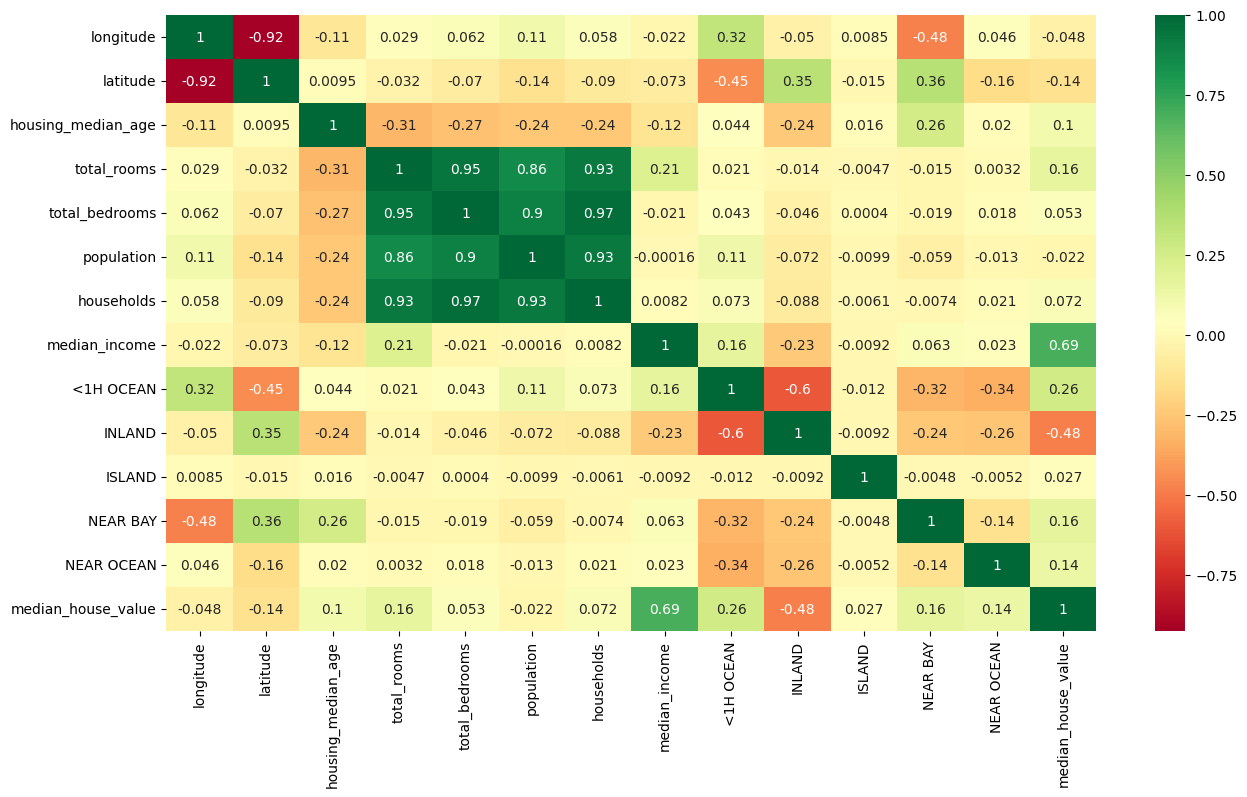

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

<Axes: xlabel='latitude', ylabel='longitude'>

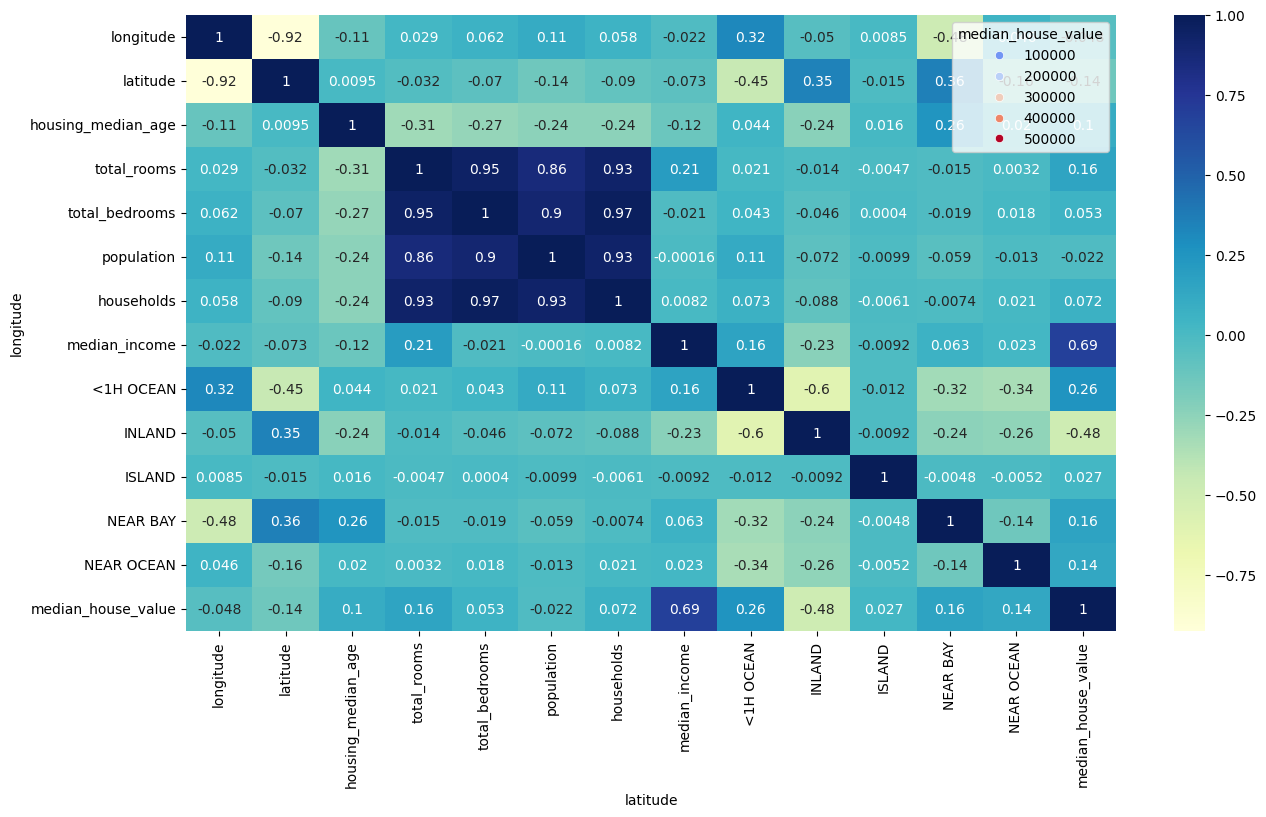

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

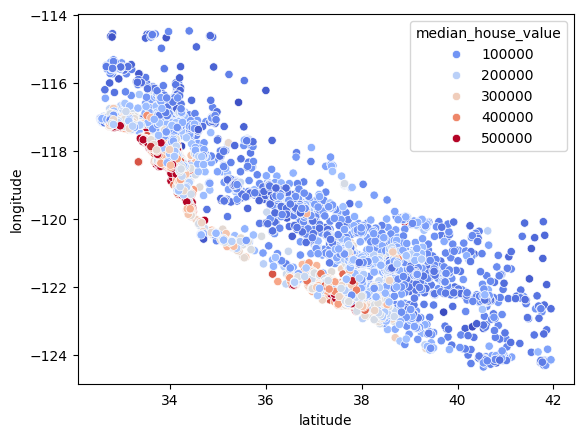

In [12]:
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette="coolwarm")

In [13]:
reg=LinearRegression()


In [14]:
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
reg.score(x_train,y_train)

0.6456482397646103

In [16]:
test_data['total_rooms']=np.log(test_data['total_rooms'])
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'])
test_data['population']=np.log(test_data['population'])
test_data['households']=np.log(test_data['households'])

NameError: name 'test_data' is not defined

In [ ]:
reg.score(x_test,y_test)

0.6488402154431997

In [ ]:
forest=RandomForestRegressor()
forest.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
forest.score(x_test,y_test)

0.8257395322374752

In [ ]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
knn.score(x_test,y_test)

0.2627447013252142

In [ ]:
mlp=MLPRegressor()
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)


0.329608785347972

In [ ]:
param_grid = { 
    "n_estimators": [200, 500],
    "max_features": ["auto", "sqrt", "log2"],
}
grid = GridSearchCV(forest, param_grid, cv=5,scoring='r2',return_train_score=True)
grid.fit(x_train, y_train)  

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='r2')

In [ ]:
grid.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=500)

In [ ]:
grid.best_estimator_.score(x_test,y_test)

0.8193830945263691

In [ ]:
forest.score(x_test,y_test)

0.8257395322374752

In [ ]:
grid.best_score_

0.8128419173065872

In [ ]:
param_grid = { 
    "n_estimators": [200, 500],
    "max_features": ["auto", "sqrt", "log2"],
}
grid = GridSearchCV(forest, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid.fit(x_train, y_train)  

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=500)

In [ ]:
param_grid = { 
    "n_estimators": [50, 200],
    "max_features": ["auto", "sqrt", "log2"],
}
grid = GridSearchCV(forest, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid.fit(x_train, y_train)  

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid.best_estimator_


RandomForestRegressor(max_features='log2', n_estimators=200)

In [ ]:
grid.best_estimator_.score(x_test,y_test)

0.8178792058459489

In [ ]:
y_pred = forest.predict(x_test)

In [ ]:
pd.DataFrame({'prediction':y_pred}).set_index(y_test.index)

,prediction
14416,218369.02
16383,151860.00
7731,192049.00
1410,146410.00
1335,153396.00
...,...
8291,378800.12
6274,160625.00
2997,93780.00
13440,108746.00


In [ ]:
y_comp=pd.DataFrame(y_test)

In [ ]:
y_comp1=y_comp.join(pd.DataFrame({'prediction':y_pred}).set_index(y_test.index))

In [ ]:
y_comp1

,median_house_value,prediction
14416,245800.0,218369.02
16383,137900.0,151860.00
7731,218200.0,192049.00
1410,220800.0,146410.00
1335,170500.0,153396.00
...,...,...
8291,500001.0,378800.12
6274,157900.0,160625.00
2997,100200.0,93780.00
13440,127700.0,108746.00
